In [1]:
import networkx as nx
import numpy.random as ra
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [22]:
n = 30
p = 0.3
r = 0.5

nchoose3 = n*(n-1)*(n-2)/6

num_steps = 500000
num_snapshots = 10000
steps_per_snapshot = num_steps // num_snapshots

m = int(n * r)
while m*(m-1)*(m-2)/6 < nchoose3 * r * r * r:
    m += 1

G = nx.complete_graph(m)
G.add_nodes_from(range(m,n))
#G = nx.erdos_renyi_graph(n,r)

tcount = m*(m-1)*(m-2)/6
cutsize = len([(u,v) for (u,v) in G.edges() if u <= n//2 and v > n//2])

tcounts = []
cutsizes = []
graphs = []
maxdegs = []
mindegs = []

for i in tqdm(range(num_steps)):
    u = ra.randint(n)
    v = ra.randint(n)
    while v == u:
        v = ra.randint(n)
    
    if ra.random() < p:
        if not G.has_edge(u,v):
            G.add_edge(u,v)
            tcount += len(list(nx.common_neighbors(G,u,v)))
            if u < n//2 and v >= n//2 or u >= n//2 and v < n//2:
                cutsize += 1
    elif G.has_edge(u,v):
        newtcount = tcount
        newtcount -= len(list(nx.common_neighbors(G,u,v)))
                
        if newtcount >= nchoose3 * r**3:
            G.remove_edge(u,v)
            tcount = newtcount
            if u < n//2 and v >= n//2 or u >= n//2 and v < n//2:
                cutsize -= 1
            
    
    if i % steps_per_snapshot == 0:
        tcounts.append(tcount)
        cutsizes.append(cutsize)
        graphs.append(G.copy())
        ds = [d for (_,d) in G.degree()]
        maxdegs.append(max(ds))
        mindegs.append(min(ds))


100%|██████████| 500000/500000 [00:12<00:00, 39238.97it/s]


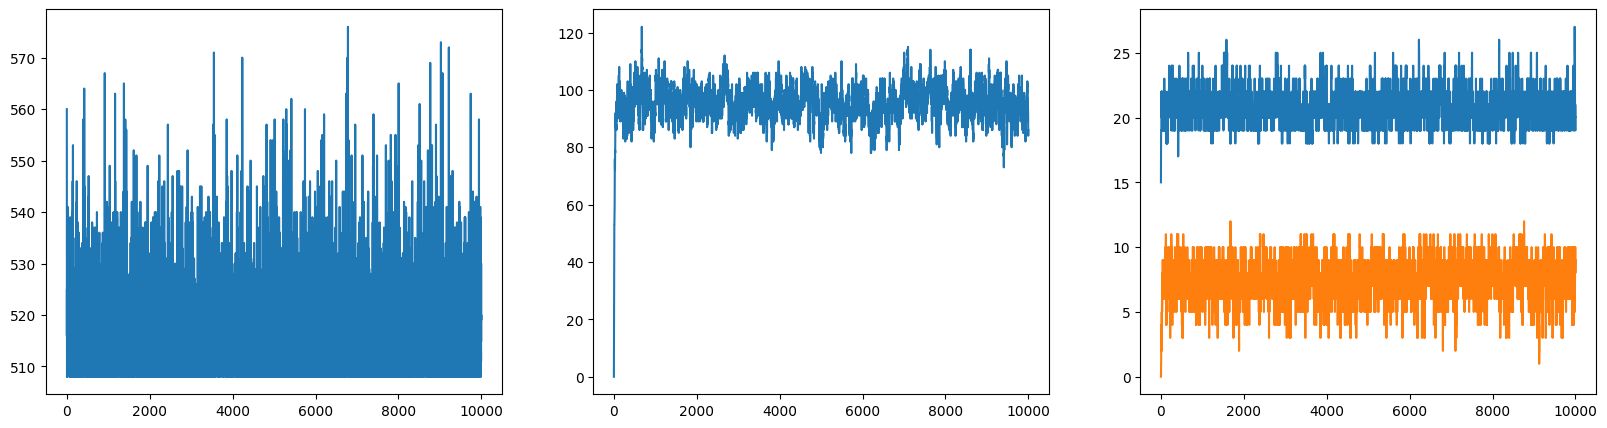

In [23]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
_=ax[0].plot(tcounts)
_=ax[1].plot(cutsizes)
_=ax[2].plot(maxdegs)
_=ax[2].plot(mindegs)

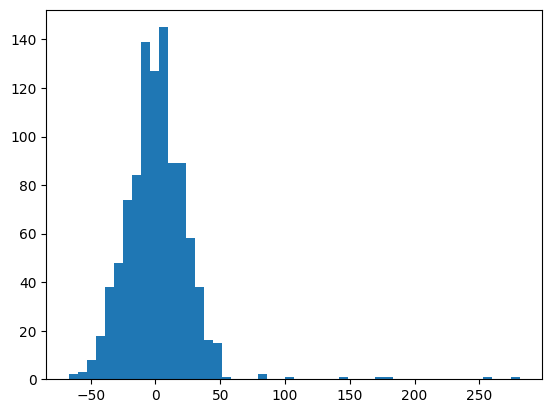

In [24]:
def overlap(G,H):
    o = 0
    for u in range(n):
        for v in range(u):
            if G.has_edge(u,v) ^ H.has_edge(u,v):
                o -= 1
            else:
                o += 1
    return o

num_pairs = 1000
ns = list(range(len(graphs)))
overlaps = np.array([ overlap(graphs[ra.choice(ns)],graphs[ra.choice(ns)]) for _ in range(num_pairs)])
_=plt.hist(overlaps, bins=50)